<a href="https://colab.research.google.com/github/Pratyush0210/Car_price_prediction_unmessenger/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unmessenger**
# **Assignment 6**
## **Pratyush Kumar Garg**

## **CAR PRICE PREDICTION**
The "Car Price Prediction" dataset is a diverse collection of data on car models and attributes sourced from multiple websites. Its aim is to provide a comprehensive resource for researchers and data scientists to build regression models to predict car prices. The dataset contains a wide range of features, allowing for the analysis of trends and patterns in the automotive market. This dataset is valuable for anyone interested in regression analysis or the automotive industry.

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
import numpy as np
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [219]:
car_price = pd.read_csv("/content/drive/MyDrive/python data science/Pandas /Unmessenger_modelling/car_data.csv")
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [220]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [221]:
car_price.shape

(301, 9)

In [222]:
car_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [223]:
car_price.corr()

<ipython-input-223-93f38ccec8d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_price.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<ipython-input-224-b82ddab84a80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_price.corr(), annot = True)


<Axes: >

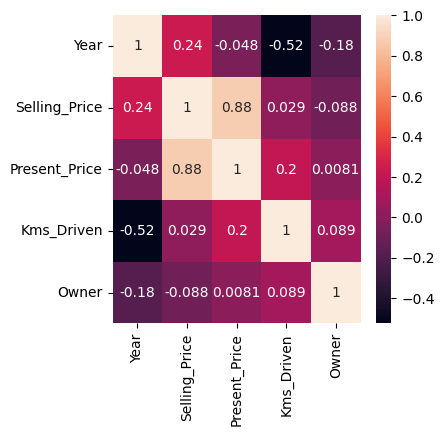

In [224]:
sns.heatmap(car_price.corr(), annot = True)

### **Univariate Analysis**

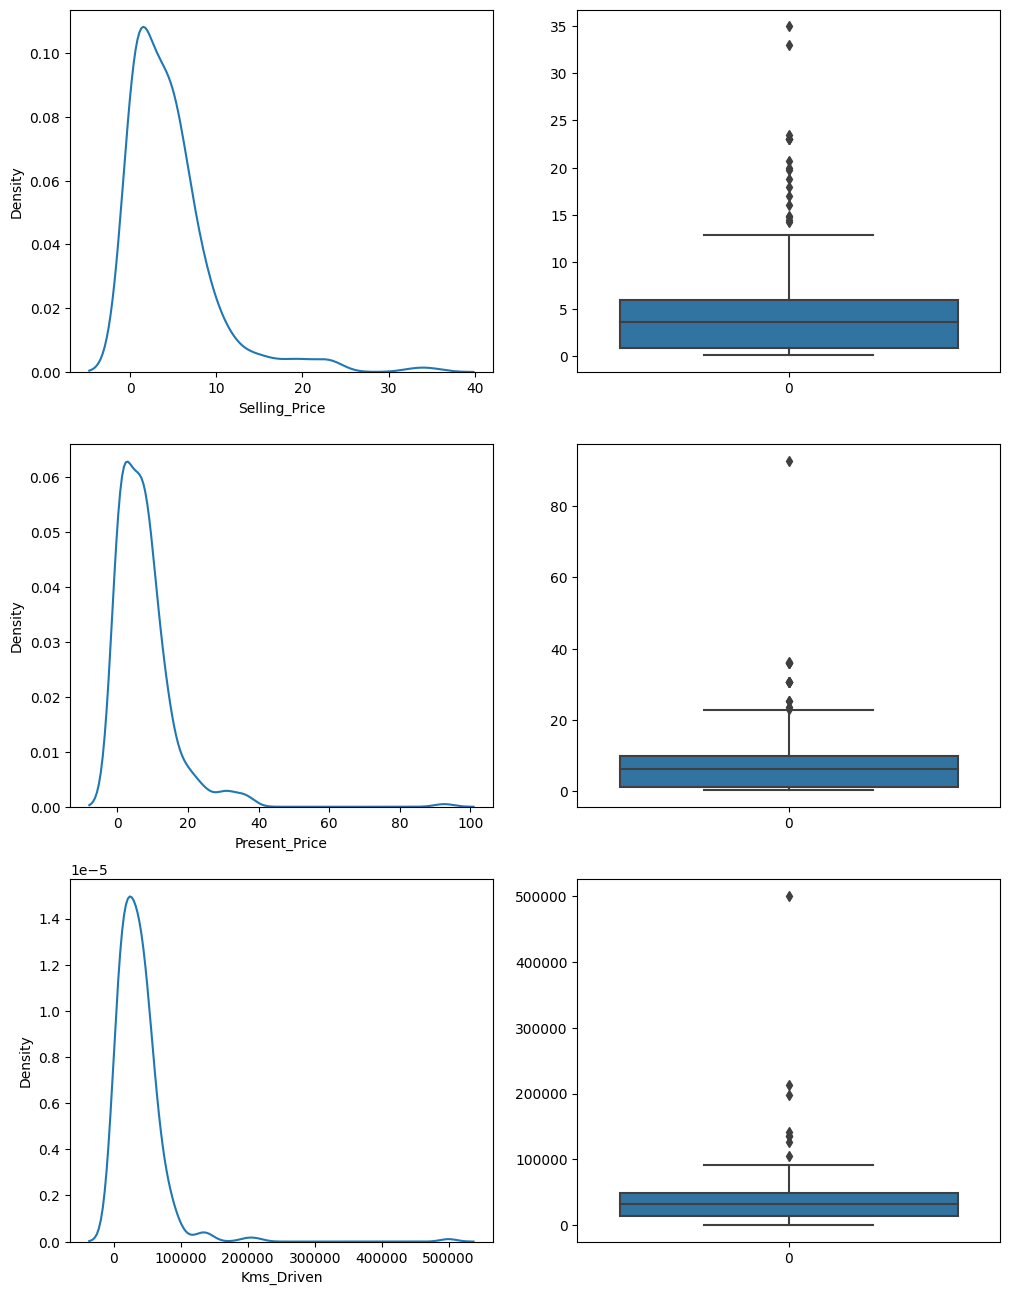

In [225]:
figure, axis = plt.subplots(3, 2)
figure.set_size_inches(12, 16)

plot = sns.kdeplot(data=car_price, x="Selling_Price", ax=axis[0][0])
plot = sns.boxplot(car_price['Selling_Price'], ax=axis[0][1])

plot = sns.kdeplot(data=car_price, x="Present_Price", ax=axis[1][0])
plot = sns.boxplot(car_price['Present_Price'], ax=axis[1][1])

plot = sns.kdeplot(data=car_price, x="Kms_Driven", ax=axis[2][0])
plot = sns.boxplot(car_price['Kms_Driven'], ax=axis[2][1])

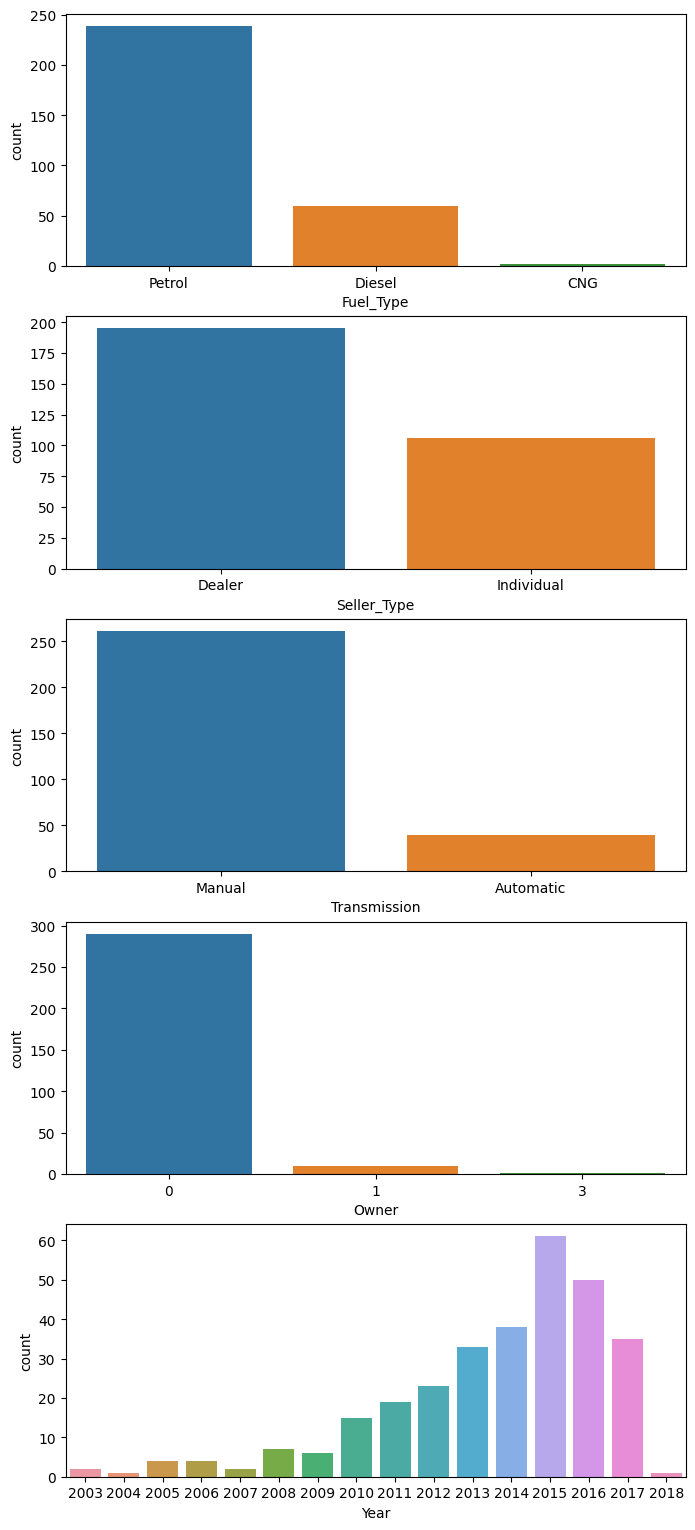

In [226]:
fig, axs = plt.subplots(5,1)
fig.set_size_inches(8, 19)

plot = sns.countplot(x = car_price['Fuel_Type'], ax=axs[0])
plot = sns.countplot(x = car_price['Seller_Type'], ax=axs[1])
plot = sns.countplot(x = car_price['Transmission'], ax=axs[2])
plot = sns.countplot(x = car_price['Owner'], ax=axs[3])
plot = sns.countplot(x = car_price['Year'], ax=axs[4])

### **Bivariate Analysis**

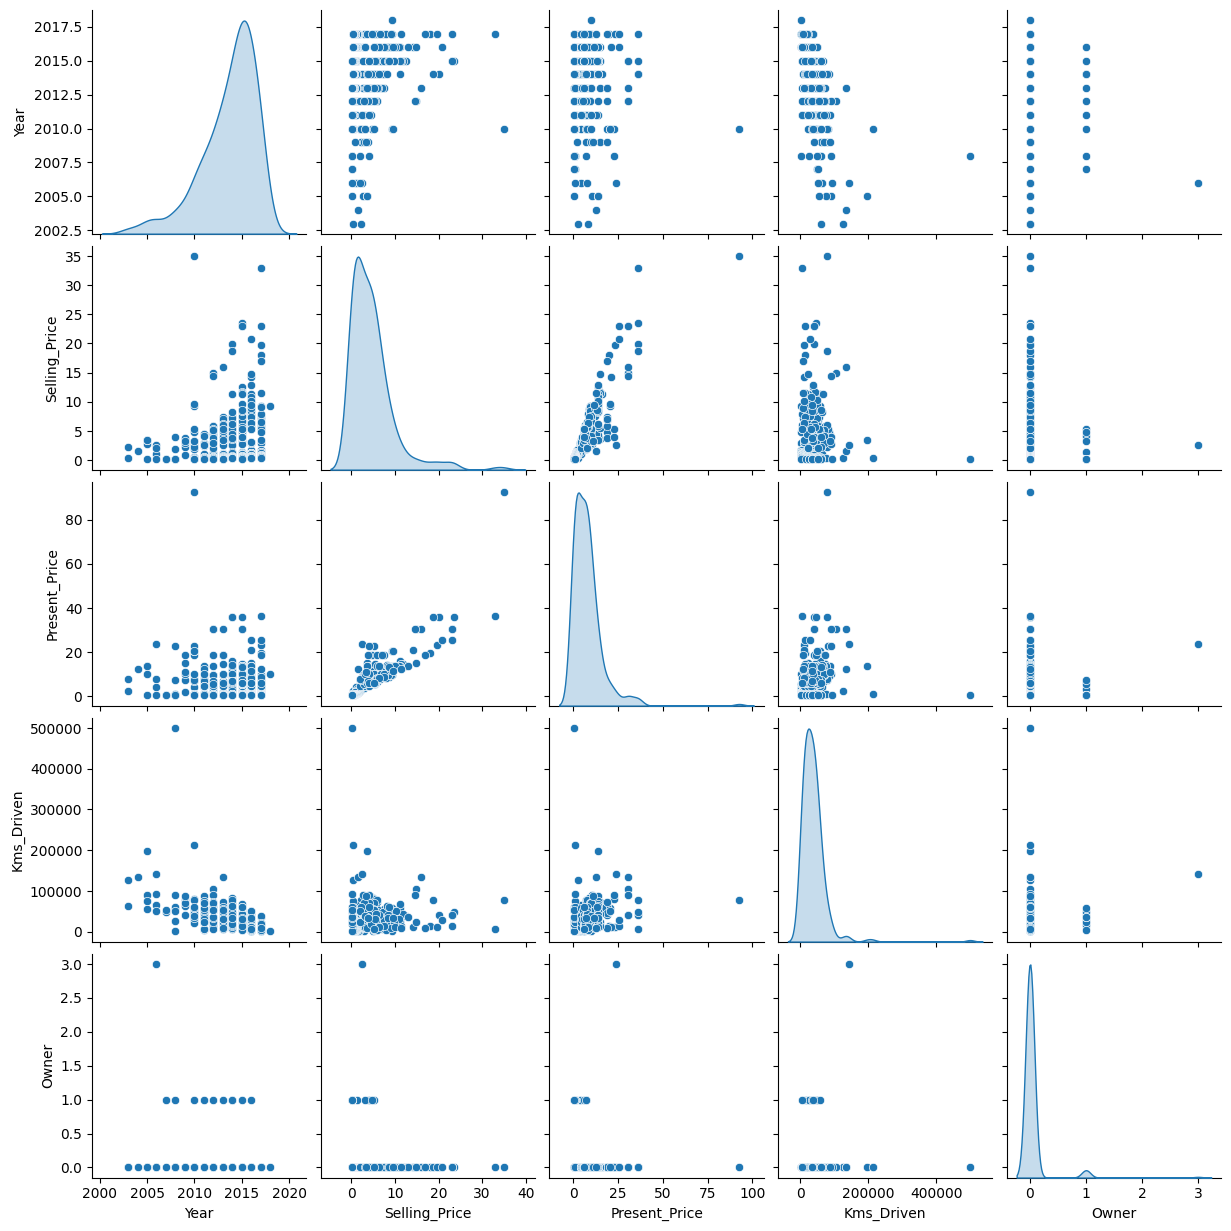

In [227]:
sns.pairplot(car_price, diag_kind='kde')

### **Multivariate Analysis**

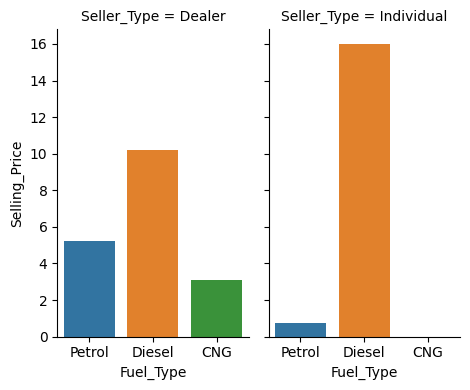

In [228]:
sns.catplot(
    data=car_price, x="Fuel_Type", y="Selling_Price", col="Seller_Type",
    kind="bar", height=4, aspect=.6, errorbar=None
)

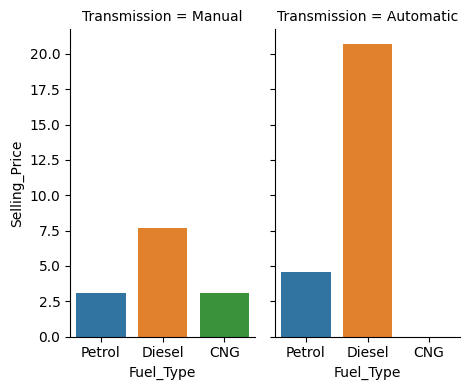

In [229]:
sns.catplot(
    data=car_price, x="Fuel_Type", y="Selling_Price", col="Transmission",
    kind="bar", height=4, aspect=.6, errorbar=None
)

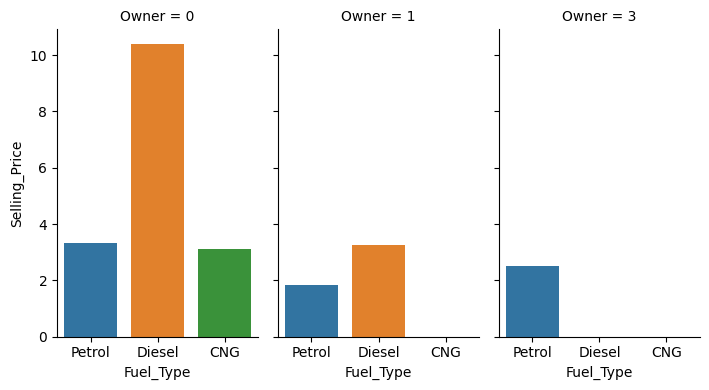

In [230]:
sns.catplot(
    data=car_price, x="Fuel_Type", y="Selling_Price", col="Owner",
    kind="bar", height=4, aspect=.6, errorbar=None
)

## **Data Preprocessing**

### **Handling Null values**

In [231]:
car_price.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### **Handling Categorical values**

- **Year and Owner** are ordinal categorical values. As we see, there are hierarchy in categories.
- More older car have less price than newer.
- More number of past owners reduce the price of car.
- Create a new label **'Age'** of car by substracting **'Year'** to present year.

In [232]:
car_price['Age'] = dt.date.today().year - car_price['Year']

- No need of Car_Name and Year columns.

In [233]:
car_price.drop(['Year', 'Car_Name'], axis=1, inplace=True)

- **Fuel_Type, Seller_Type, and Transmission** are nominal categorical values. As we see, there are no hierarchy in categories.

In [234]:
car_price_dummy = pd.get_dummies(data = car_price) 

In [235]:
car_price_dummy.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,9,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,10,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,6,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,12,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,9,0,1,0,1,0,0,1


In [236]:
car_price_dummy.corr()["Selling_Price"].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Seller_Type_Dealer        0.550724
Transmission_Automatic    0.367128
Kms_Driven                0.029187
Fuel_Type_CNG            -0.025164
Owner                    -0.088344
Age                      -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

### **Handling Outliers**

In [237]:
def Detect_Fix_Outliers_IQR(data, col_name):
    q3, q1 = data[col_name].quantile(0.75), data[col_name].quantile(0.25)
    high_threshold, low_threshold = q3 + 1.5*(q3 - q1), q1 - 1.5*(q3 - q1)

    outlier_booleans = np.logical_or(data[col_name].values > high_threshold, data[col_name].values < low_threshold)
    outlier_indexes = np.where(outlier_booleans)[0]

    print(f" Number of Outlier Detected : {len(outlier_indexes)}")

    data[col_name] = np.clip(data[col_name], low_threshold, high_threshold)

    return data

In [238]:
cols = ['Selling_Price', 'Present_Price', 'Kms_Driven']

for col in cols:
    Detect_Fix_Outliers_IQR(car_price_dummy, col)

 Number of Outlier Detected : 17
 Number of Outlier Detected : 14
 Number of Outlier Detected : 8


### **Data Transformation**

In [239]:
car_price_dummy.mean()

Selling_Price                 4.272359
Present_Price                 7.076578
Kms_Driven                34426.617940
Owner                         0.043189
Age                           9.372093
Fuel_Type_CNG                 0.006645
Fuel_Type_Diesel              0.199336
Fuel_Type_Petrol              0.794020
Seller_Type_Dealer            0.647841
Seller_Type_Individual        0.352159
Transmission_Automatic        0.132890
Transmission_Manual           0.867110
dtype: float64

In [240]:
car_price_dummy.std()

Selling_Price                 3.749446
Present_Price                 6.162499
Kms_Driven                23726.441467
Owner                         0.247915
Age                           2.891554
Fuel_Type_CNG                 0.081378
Fuel_Type_Diesel              0.400166
Fuel_Type_Petrol              0.405089
Seller_Type_Dealer            0.478439
Seller_Type_Individual        0.478439
Transmission_Automatic        0.340021
Transmission_Manual           0.340021
dtype: float64


- **1. square root transformation**
- **2. cube root transformation**


In [241]:
car_price_dummy['Selling_Price_trans'] = (car_price_dummy['Selling_Price'])**.35
car_price_dummy['Present_Price_trans'] = np.cbrt(car_price_dummy['Present_Price'])
car_price_dummy['Kms_Driven_trans'] = np.sqrt(car_price_dummy['Kms_Driven'])

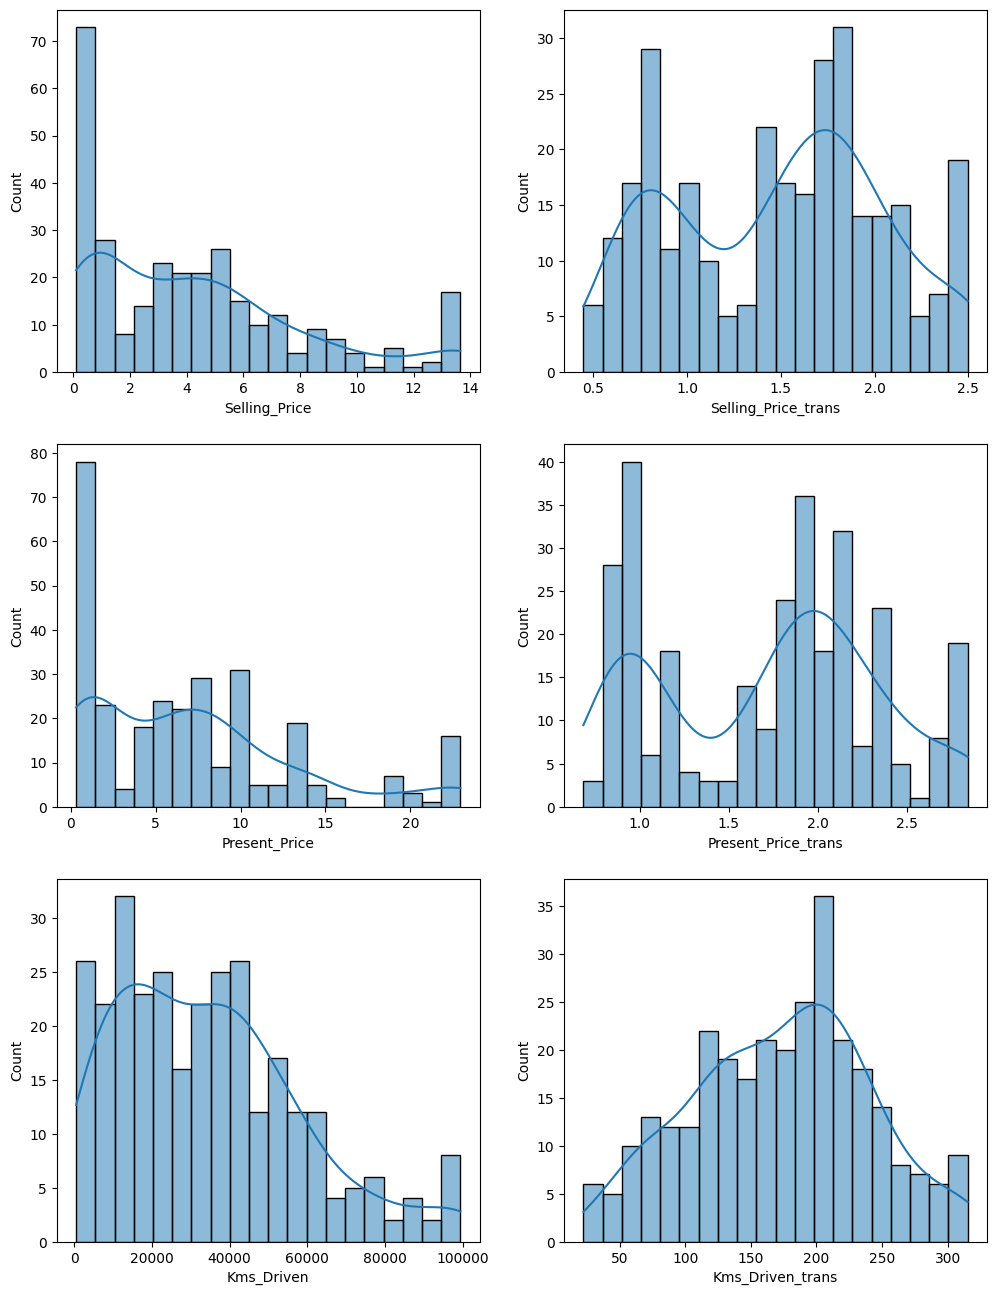

In [242]:
fig1, axes = plt.subplots(3,2)
fig1.set_size_inches(12, 16)

plot = sns.histplot(car_price_dummy['Selling_Price'], kde=True, bins= 20, ax = axes[0][0])
plot = sns.histplot(car_price_dummy['Selling_Price_trans'], kde=True, bins= 20, ax = axes[0][1])

plot = sns.histplot(car_price_dummy['Present_Price'], kde=True, bins= 20, ax = axes[1][0])
plot = sns.histplot(car_price_dummy['Present_Price_trans'], kde=True, bins= 20, ax = axes[1][1])

plot = sns.histplot(car_price_dummy['Kms_Driven'], kde=True, bins= 20, ax = axes[2][0])
plot = sns.histplot(car_price_dummy['Kms_Driven_trans'], kde=True, bins= 20, ax = axes[2][1])

## **Test Train Split**

In [244]:
car_price_dummy_original = car_price_dummy.loc[:, 'Selling_Price': 'Kms_Driven']
car_price_dummy_original.head()

,Selling_Price,Present_Price,Kms_Driven
0,3.35,5.59,27000.0
1,4.75,9.54,43000.0
2,7.25,9.85,6900.0
3,2.85,4.15,5200.0
4,4.60,6.87,42450.0


In [245]:
car_price_dummy_trans = car_price_dummy.loc[:, 'Owner':]
car_price_dummy_trans.head()

,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Selling_Price_trans,Present_Price_trans,Kms_Driven_trans
0,0,9,0,0,1,1,0,0,1,1.526742,1.774750,164.316767
1,0,10,0,1,0,1,0,0,1,1.725213,2.120880,207.364414
2,0,6,0,0,1,1,0,0,1,2.000407,2.143608,83.066239
3,0,12,0,0,1,1,0,0,1,1.442765,1.607001,72.111026
4,0,9,0,1,0,1,0,0,1,1.705946,1.901015,206.033978


In [246]:
X = car_price_dummy_trans.drop('Selling_Price_trans',axis=1)
y = car_price_dummy_trans['Selling_Price_trans']

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 11)
x test:  (61, 11)
y train:  (240,)
y test:  (61,)


## **Model Creation**

- Linear Regression
- Lasso Regression
- Random Forest Regression
- Gradient Boosting regression

In [269]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

**RandomizedSearchCV**: Randomized search on hyper parameters.

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [250]:
def car_pred_model(model):

    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train = round(R2_train_model,2)

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test = round(R2_test_model,2)

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV = round(cv_mean,2)

    return R2_train, R2_test, cross_val, CV, y_pred_train, y_pred_test


In [251]:
# Printing results

def print_result(score_train, score_test, cv_list, cv_mean):
    
    print("Train R2-score :", score_train)
    print("Test R2-score :", score_test)
    print("Train CV scores :", cv_list)
    print("Train CV mean :", cv_mean)

In [252]:
def MSE(y , y_hat): # lesser the better 
    error = y - y_hat 
    squared_error = np.square(error)
    mean_squared_error = np.mean(np.square(error))
    return round(mean_squared_error,4)

In [253]:
# Plotting Graphs

def plot_graph(y_train_prediction, y_test_prediction):
     
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))

    ax[0].set_title('Residual Plot of Train samples')
    sns.kdeplot((y_train-y_train_prediction),ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_prediction)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

### **1) Linear Regression**
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 

In [277]:
lr = LinearRegression()

In [278]:
r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr, y_pred_train_values_lr, y_pred_test_values_lr= car_pred_model(lr)

In [279]:
print_result(r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr)
print('Mean square error: ', MSE(y_test, y_pred_test_values_lr))

Train R2-score : 0.96
Test R2-score : 0.96
Train CV scores : [0.96105455 0.96359721 0.95413362 0.95970952 0.94272748]
Train CV mean : 0.96
Mean square error:  0.0134


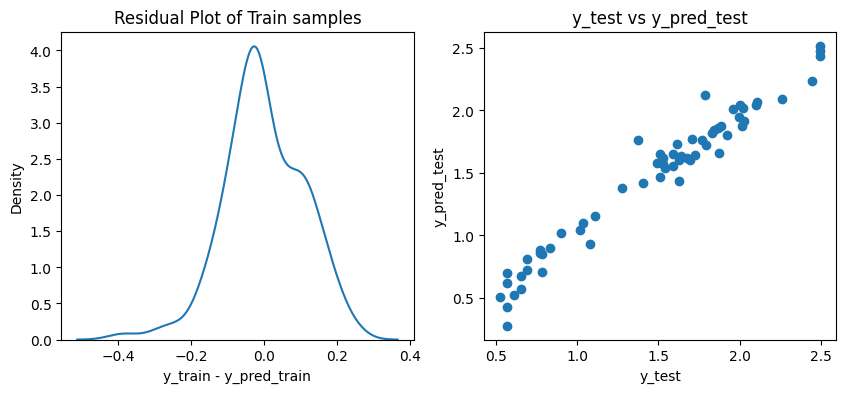

In [280]:
plot_graph(y_pred_train_values_lr, y_pred_test_values_lr)

### **2) Lasso**
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing. 
- **alpha**: Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf). When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object.


In [281]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

In [282]:
r2_score_train_ls, r2_score_test_ls, crossval_list_ls, CVmean_ls, y_pred_train_values_ls, y_pred_test_values_ls = car_pred_model(ls_rs)

In [283]:
print_result(r2_score_train_ls, r2_score_test_ls, crossval_list_ls, CVmean_ls)
print('Mean square error: ', MSE(y_test, y_pred_test_values_ls))

Train R2-score : 0.96
Test R2-score : 0.96
Train CV scores : [0.96056361 0.96567031 0.95521629 0.96025369 0.94664364]
Train CV mean : 0.96
Mean square error:  0.0144


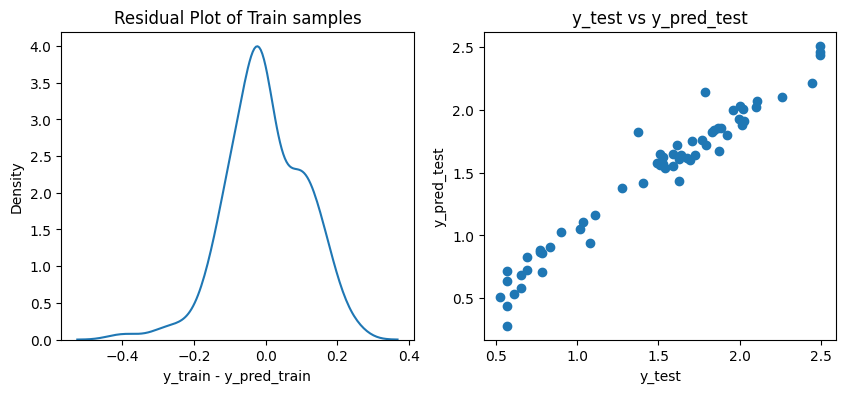

In [284]:
plot_graph(y_pred_train_values_ls, y_pred_test_values_ls)

### **3) Random Forest Regressor**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

- **n_estimators**: The number of trees in the forest.
- **max_depth**: Max number of levels in a tree.
- **min_samples_split**: Minimum number of samples required to split an internal node.
- **min_samples_leaf**: Minimum number of samples required to be at a leaf node.
- **max_features**: The number of features to consider when looking for the best split.

In [285]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))

# Maximum number of levels in a tree
max_depth=list(range(4,9,4))

# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]

# Number of fearures to be considered at each split
max_features=['sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [286]:
r2_score_train_rf, r2_score_test_rf, crossval_list_rf, CVmean_rf, y_pred_train_values_rf, y_pred_test_values_rf = car_pred_model(rf_rs)

In [287]:
print_result(r2_score_train_rf, r2_score_test_rf, crossval_list_rf, CVmean_rf)
print('Mean square error: ', MSE(y_test, y_pred_test_values_rf))

Train R2-score : 0.98
Test R2-score : 0.96
Train CV scores : [0.95778119 0.89868408 0.94948278 0.95034704 0.94625629]
Train CV mean : 0.94
Mean square error:  0.0117


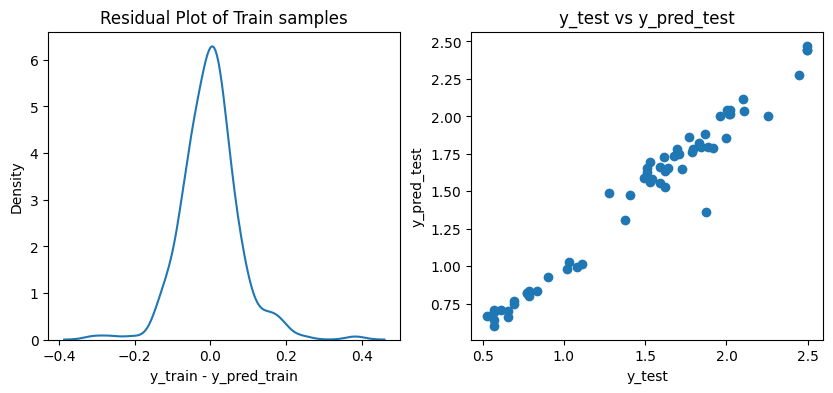

In [288]:
plot_graph(y_pred_train_values_rf, y_pred_test_values_rf)

In [289]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=6,
                      n_estimators=700)


### **4) Gradient Boosting regression**
This estimator builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.
- **learning_rate**: Learning rate shrinks the contribution of each tree by learning_rate.
- **n_estimators**: The number of trees in the forest.
- **max_depth**: Max number of levels in a tree.
- **min_samples_split**: Minimum number of samples required to split an internal node.
- **min_samples_leaf**: Minimum number of samples required to be at a leaf node.
- **max_features**: The number of features to consider when looking for the best split.

In [290]:
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [291]:
r2_score_train_gb, r2_score_test_gb, crossval_list_gb, CVmean_gb, y_pred_train_values_gb, y_pred_test_values_gb = car_pred_model(gb_rs)

In [300]:
print_result(r2_score_train_gb, r2_score_test_gb, crossval_list_gb, CVmean_gb)
print('Mean square error: ', MSE(y_test, y_pred_test_values_gb))

Train R2-score : 1.0
Test R2-score : 0.97
Train CV scores : [0.97358221 0.95785081 0.95407604 0.96624969 0.96957384]
Train CV mean : 0.96
Mean square error:  0.0088


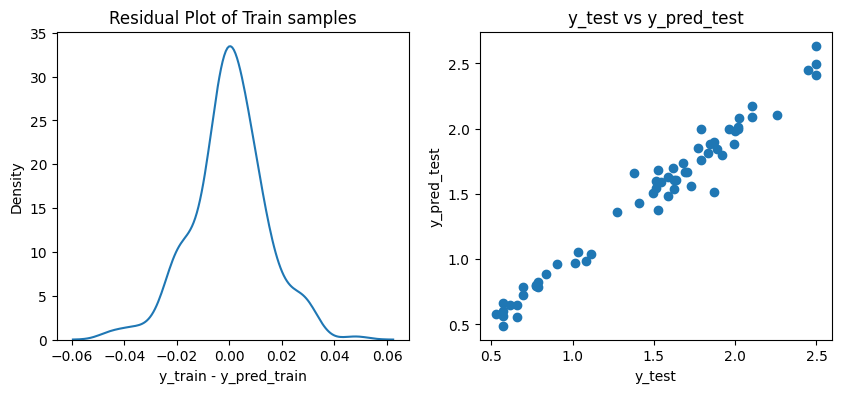

In [301]:
plot_graph(y_pred_train_values_gb, y_pred_test_values_gb)

In [302]:
print(gb_rs.best_estimator_)

GradientBoostingRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=7,
                          min_samples_split=8, n_estimators=900)


In [311]:
print(f"{'Model Name':30} {'R2_score (Train)':17} {'R2_score (Test)':17} {'Cross_Value (mean)':20} {'MSE':6}")
print('-'*95)
print(f"{'GradientBoostingRegressor':30} {r2_score_train_gb:<17} {r2_score_test_gb:<17} {CVmean_gb:<20} {MSE(y_test, y_pred_test_values_gb):<6}")
print(f"{'RandomForestRegressor':30} {r2_score_train_rf:<17} {r2_score_test_rf:<17} {CVmean_rf:<20} {MSE(y_test, y_pred_test_values_rf):<6}")
print(f"{'LinearRegression':30} {r2_score_train_lr:<17} {r2_score_test_lr:<17} {CVmean_lr:<20} {MSE(y_test, y_pred_test_values_lr):<6}")
print(f"{'Lasso':30} {r2_score_train_ls:<17} {r2_score_test_ls:<17} {CVmean_ls:<20} {MSE(y_test, y_pred_test_values_ls):<6}")


Model Name                     R2_score (Train)  R2_score (Test)   Cross_Value (mean)   MSE   
-----------------------------------------------------------------------------------------------
GradientBoostingRegressor      1.0               0.97              0.96                 0.0088
RandomForestRegressor          0.98              0.96              0.94                 0.0117
LinearRegression               0.96              0.96              0.96                 0.0134
Lasso                          0.96              0.96              0.96                 0.0144


- **GradientBoostingRegressor** is **highest R2_scores** and **Least Mean square error**. This is the best model in comparison to other three.